<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>KNN Assignment (Solution)<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- The K-nearest neighbors (KNN) algorithm is a simple, easy-to-implement **supervised machine learning** algorithm.

- It can be used to solve both **classification** and **regression** problems.

- The KNN algorithm assumes that **similar things** exist in **close proximity**. In other words, similar things are near to each other.

#<center> ***Birds of a feather flock together***</center>

- KNN captures the idea of **similarity** (distance, proximity, or closeness) with **calculating** the **distance** between points on a graph.<br><br>

<center><img src="https://www.newtechdojo.com/wp-content/uploads/2020/06/KNN-1.gif"></center><br>

- The straight-line distance (also called the **Euclidean distance**) is a **popular** and **familiar** choice for calculating the distance.






---
<a name = Section2></a>
# **2. Problem Statement**
---

- **Diabetes** is one of the **common** issues in today's world and **detecting** it **early** could be **benefecial** for many potential patients. 

- Pre-diabetic stages can be detected by various factors such as:
  - **glucose levels**, 
  - **insulin levels**, 
  - **skin thickness**, 
  - **Body-Mass Index ratio**, and 
  - **blood pressure**.

<center><img src="https://image.freepik.com/free-vector/scientists-with-folder-clipboard-working-with-huge-dna-test-tube-genetic-testing-dna-testing-genetic-diagnosis-concept-white-background-pinkish-coral-bluevector-isolated-illustration_335657-1521.jpg" width=50%></center>

- Let's say **XYZ Diagnostics** have a good record of **detecting diabetes** in the early stages.

- They want to **automate** the process of **detecting diabetes** based on various factors of a patient.

- They have hired a data scientist for this task. Let's say it is you.

- You have been provided with a **dataset** that contains history of **patients**.

- Your task is to design a **classifier** that can classify if a **person** is **diabetic or not**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
# !pip install -q datascience                                         # Package that is required by pandas profiling
# !pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# !pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
# !pip install -q --upgrade pandas-profiling
# !pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To import a standard scaler for scaling the features
from sklearn.model_selection import train_test_split                # To split the data into train and test datasets
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of a classifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The datasets consists of several **medical predictor variables** and one target variable.

- Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 768 | 9 | 23.0 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
| 01 | **Pregnancies** | Number of times pregnant. |
| 02 | **Glucose** | Plasma glucose concentration after 2 hours in an oral glucose tolerance test. |
| 03 | **BloodPressure** | Diastolic blood pressure ($mm Hg$). |
| 04 | **SkinThickness** | Triceps skin fold thickness ($mm$). |
| 05 | **Insulin** | 2-Hour serum insulin ($mu U/ml$). |
| 06 | **BMI** | Body mass index (weight in $kg/(height in m)^2$) |
| 07 | **DiabetesPedigreeFunction** | Diabetes pedigree function. |
| 08 | **Age** | Age (years). |
| 09 | **Outcome** | Class variable (**0:** No diabetes or **1:** diabetes).|

In [ ]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/diabetes.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


**Observations:**

- The **average** number of **pregnancies** are **more than 3** pregnancies per patient.

- Number of pregnanices can reach as **maximum as 17** pregnancies and can be as **low as 0**.

- **Majority** of the patients have **less than 3 pregnancies**.

- The **glucose levels** range from **0.00 mg/dL upto 199.0 mg/dL** and **average** value tends to be **around 120.89 mg/dL**.

- **Zero blood sugar** should be considered **misinformation** as it not possible for anyone to have such low blood sugar.

- **Average skin thickness** is noted at **20.54mm** and **ranges** from **0.0mm to 99.0mm**.

- For normal people, **skin fold thickness** can’t be **less than 10 mm** better yet zero.

- **Average blood pressure** is noted as **69.11 mmHg** and **maximum blood pressure** is **122.00 mmHg**.

- A living person **cannot** have a diastolic **blood pressure of zero**.

- **Average BMI** is observed as **32 kg/m2** and the **max BMI** is noted as **67.1 kg/m2**.

- **BMI** should not be 0 or **close to zero** unless the person is really **underweight** which could be life-threatening.

- **More than 25%** of patients show **zero levels of insulin** after **2 hours of test**.

- **Age** varies from **21 years upto 81 years**, **averaging** at **33 years**.

- **Majority** of the patients **don't have diabetes** yet **more than 25%** have **diabetes**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations:**

- There are **768 rows** with **9 features**.

- There are **2 float64** datatype features (**BMI** and **DiabetesPedigreeFunction**) and the rest are of **int64** datatype

- All of the features have **appropriate** data types.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- There are **no missing** or **duplicate** rows in the dataset.

- **Pregnancies (14.5%)**, **BMI (1.4%)**, **Insulin (48.7%)**, **BloodPressure (4.6%)** and **SkinThickness (29.6%)** have **zero** values.

- **Pregnancies** has high **correlation** with **Age**.

- **Blood Pressure** has high **correlation** with **BMI**.

- **Insulin** has high **correlation** with **SkinThickness**.

- **DiabetesPedigreeFunction** is **skewed** towards **right**.

- There are **500 patients** who are **not diabetic** and **268 patients** who are **diabetic**.

**Performing Operations**


---
**<h4>Question 1**. Create a function that replaces the zero values of the following columns with the median values - **BMI**, **Glucose**, **SkinThickness**, and **BloodPressure**.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use the `.replace()` method to replace the zeros with the median value.

- You cna use (data[column] == 0).sum() to check how many zeros are present

</details>

In [ ]:
def fill_zeros(data=None, columns=None):
  for column in columns:
    data.replace({column:{0:data[column].median()}}, inplace=True)
    print('No. of zeros in '+str(column)+' column:',(data[column] == 0).sum())
  return data

In [ ]:
data = fill_zeros(data=data, columns=['BMI', 'Glucose', 'SkinThickness', 'BloodPressure'])

No. of zeros in BMI column: 0
No. of zeros in Glucose column: 0
No. of zeros in SkinThickness column: 0
No. of zeros in BloodPressure column: 0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.66,72.39,27.33,79.80,32.45,0.47,33.24,0.35
std,3.37,30.44,12.10,9.23,115.24,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,0.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,23.00,0.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<a name = Section52></a>
### **5.2 Post Profiling Report**

- Post Profiling report to check the statistical description of data after data cleaning operations.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- The zero values have been dealt with in the required columns.

- Glucose is now correlated with the Outcome feature.

- BMI is highly correlated with DiabetesPedigreeFunction, BloodPressure and SkinThickness.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 2:** Create a function that compares age with bloodpressure along with the diabetic condition of the patient.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inches figure.

- Plot a scatterplot using the `sns.scatterplot` method between 'Age' and 'BloodPressure' features.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def age_bp(data=None, column1=None, column2=None, column3=None):
  #Create a figure of 15 x 7 inches
  fig = plt.figure(figsize=(15, 7))

  # Create a scatterplot for age vs bloodpressure
  sns.scatterplot(x=column1, y=column2, hue=column3, data=data)

  # Add cosmetics
  plt.xlabel(xlabel=column1, fontsize=14)
  plt.ylabel(ylabel=column2, fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(label='Age vs Blood Pressure', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

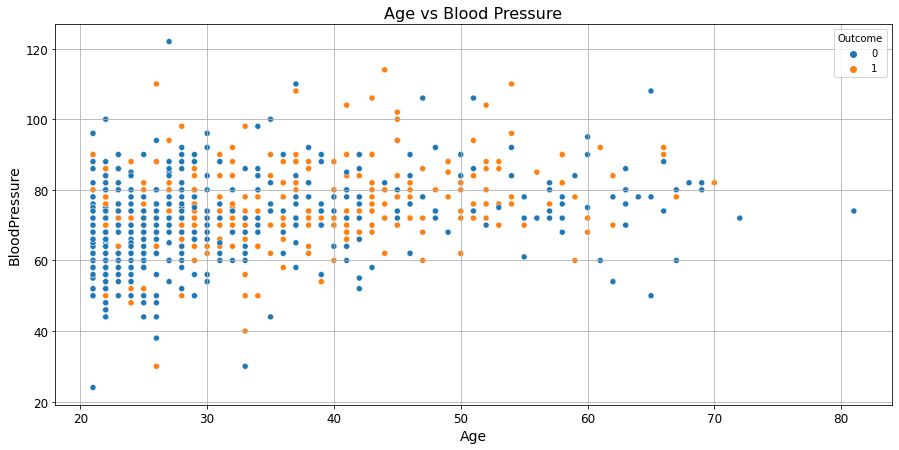

In [ ]:
age_bp(data=data, column1='Age', column2='BloodPressure', column3='Outcome')

**Observations:**

- There **does not** seem to be any specific **relation** between the age and blood pressure features.

---
**<h4>Question 3:** Create a function that compares BMI with Bloodpressure of the patient.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inches figure.

- Plot a regression plot using `sns.regplot()` on BMI and BloodPressure.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def bmi_bp(data=None, column1=None, column2=None):
  # Create a figure of 15 x 7 inches
  fig = plt.figure(figsize=(15, 7))

  # Create a regplot for BMI vs bloodpressure
  sns.regplot(x=column1, y=column2, data=data)

  # Add cosmetics
  plt.xlabel(xlabel=column1, fontsize=14)
  plt.ylabel(ylabel=column2, fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(label='BMI vs Blood Pressure', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

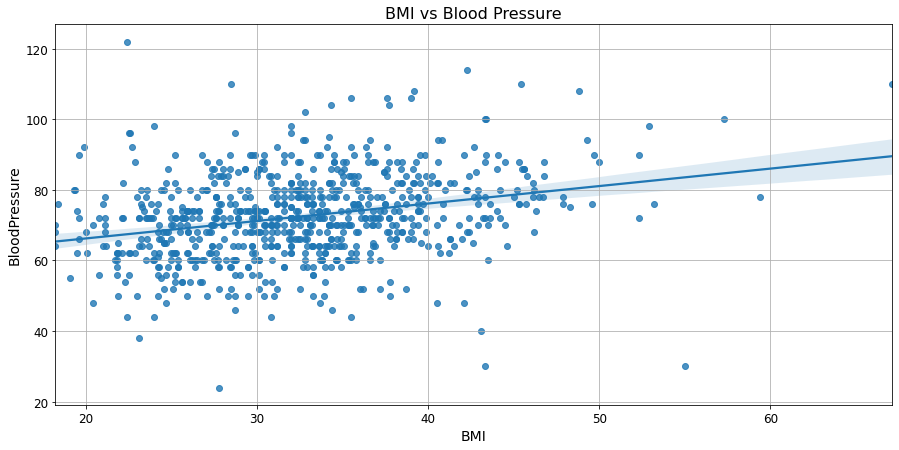

In [ ]:
bmi_bp(data=data, column1='BMI', column2='BloodPressure')

**Observations:**

- We can observe slightly **positive correlation** between the two features.

- **Obesity** causes **high BMI ratio**. So, obesity can cause blood pressure issues in patients. 

---
**<h4>Question 4:** Create a function that checks the effect of BMI on diabetic state of the patient.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a figure of 20x7 inches with 2 subplots (`nrows=1, ncols=2`).

- Plot histograms on BMI for Outcome = 1 (using ax[1].hist) and Outcome = 0 (using ax[0].hist)

- Add additional cosmetics like `grid` and `title` using the axes.

- Set `fontsize` for labels as 14 and title as 16.

- Use `plt.show()` to properly display the plot.

</details>

In [ ]:
def bmi(data=None, column1=None):
  # Create 2 subplots
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

  # Create a displot for BMI
  ax[0].hist(x=column1, data=data[data['Outcome']==0])
  ax[1].hist(x=column1, data=data[data['Outcome']==1])

  # Add cosmetics
  ax[0].set_xlabel(xlabel=column1, fontsize=14)
  ax[0].set_ylabel(ylabel='Count', fontsize=14)
  ax[0].set_title(label='BMI for Non-Diabetic', fontsize=16)
  ax[0].grid(b=True)

  ax[1].set_xlabel(xlabel=column1, fontsize=14)
  ax[1].set_ylabel(ylabel='Count', fontsize=14)
  ax[1].set_title(label='BMI for Diabetic', fontsize=16)
  ax[1].grid(b=True)

  # Display the output
  plt.show()

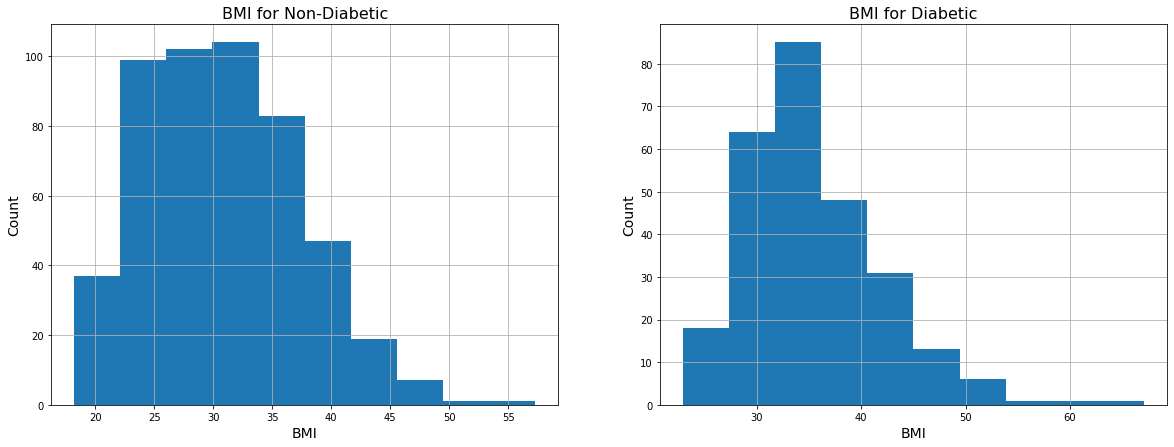

In [ ]:
bmi(data=data, column1='BMI')

**Observations:**

- Patients with **lower BMI** tend to have **less chances** of diabetes.

- As **BMI increases**, **chances** of having diabetes also **increases**.

---
**<h4>Question 5:** Create a function that checks the glucose levels and it's effect on diabetic state of the patient.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a figure of 20x7 inches with 2 subplots (`nrows=1, ncols=2`).

- Use `sns.kdeplot()` on Glucose for Outcome = 1 and Outcome = 0.

- Keep fill parameter as True for the kdeplot.

- Assign axis to each of the plots.

- Add additional cosmetics like `grid` and `title` using the axes.

- Set `fontsize` for labels as 14 and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def glucose(data=None, column1=None):
  # Create 2 subplots
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

  # Create a displot for BMI
  sns.kdeplot(x=column1, data=data[data['Outcome']==0], fill=True, ax=ax[0])
  sns.kdeplot(x=column1, data=data[data['Outcome']==1], fill=True, ax=ax[1])

  # Add cosmetics
  ax[0].set_xlabel(xlabel=column1, fontsize=14)
  ax[0].set_ylabel(ylabel='Count', fontsize=14)
  ax[0].set_title(label='Glucose for Non-Diabetic', fontsize=16)
  ax[0].grid(b=True)

  ax[1].set_xlabel(xlabel='Glucose Levels', fontsize=14)
  ax[1].set_ylabel(ylabel='Count', fontsize=14)
  ax[1].set_title(label='Glucose for Diabetic', fontsize=16)
  ax[1].grid(b=True)

  # Display the output
  plt.show()

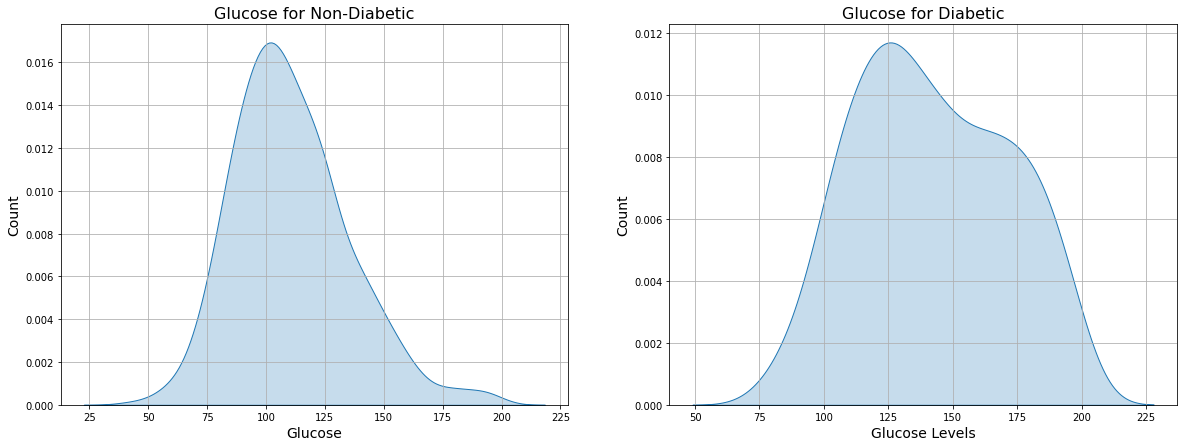

In [ ]:
glucose(data=data, column1='Glucose')

**Observations:**

- **Non-diabetic** patients have **glucose levels** ranging from **25 to 210** mg/dL.

- **Diabetic** patients have **glucose levels** ranging from **50 to 225** mg/dL.

- **Diabetic** patients with **low glucose levels** could be **level 1 diabetic** patients as well.

---
**<h4>Question 6:** Create a function that plots a hexbin plot comparing glucose levels across all the ages.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `sns.jointplot()` with `kind='hex'` on glucose and age variables.

- Keep the size paramter of the jointplot as 7.

- Add additional cosmetics like `grid` and `suptitle`.

- Set `fontsize` for ticks as 12, labels as 14 and supertitle as 16.

- Use `plt.show()` to properly display the plot.

</details>

In [ ]:
def age_glucose(data=data, column1=None, column2=None):
  # Create a scatterplot for age vs bloodpressure
  sns.jointplot(x=column1, y=column2, kind="hex", color="#4CB391", data=data, size=7)

  # Add cosmetics
  plt.xlabel(xlabel=column1, fontsize=14)
  plt.ylabel(ylabel=column2, fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.suptitle(t='Age vs Glucose', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

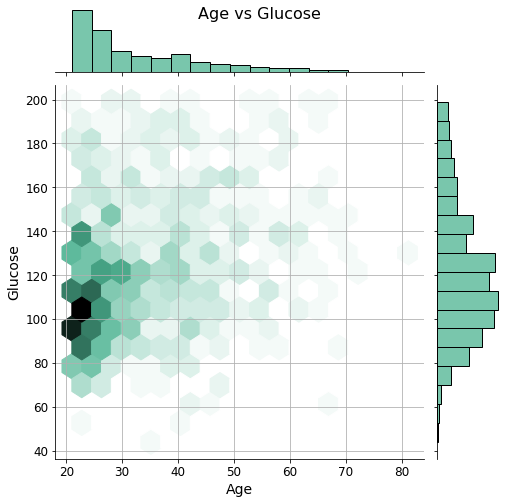

In [ ]:
age_glucose(data=data, column1='Age', column2='Glucose')

**Observations:**

- **Majority** of patients with age between **20-35 years** have a decent glucose levels ranging between **80-140 mg/dL**.

- **Suitable** glucose levels range from **100-170 mg/dL**.

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Scaling**

- In this section, we will perform standard scaling over the features.

---
**<h4>Question 7:** Create a function that creates two dataframes for dependent and independent features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "Outcome" feature from axis 1.

- Create target series by using "Outcome" as value.

</details>


In [ ]:
def seperate_Xy(data=None):
  X = data.drop(labels=['Outcome'], axis=1)
  y = data['Outcome']
  return X, y

In [ ]:
X, y = seperate_Xy(data=data)


---
**<h4>Question 8:** Create a function that scales the dataframe of independednt features using a standard scaler.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a scaler using StandardScaler()

- Fit and transform **X** using `.fit_transform(X)` method of the **StandardScaler**.

- Put the values of scaled X (in numpy array format) into a new dataframe with column names of X.

</details>

In [ ]:
def scale_data(X=None):
  sc = StandardScaler()
  features = X.columns
  scaled_data = sc.fit_transform(X)
  scaled_X = pd.DataFrame(data=scaled_data, columns=features)
  return scaled_X

In [ ]:
scaled_X = scale_data(X=X)
scaled_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.64,0.87,-0.03,0.83,-0.69,0.17,0.47,1.43
1,-0.84,-1.21,-0.53,0.18,-0.69,-0.85,-0.37,-0.19
2,1.23,2.02,-0.69,-0.47,-0.69,-1.33,0.60,-0.11
3,-0.84,-1.07,-0.53,-0.47,0.12,-0.63,-0.92,-1.04
4,-1.14,0.50,-2.68,0.83,0.77,1.55,5.48,-0.02


<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 9:** Create a function that splits the data into train and test datasets while keeping random state as 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `train_test_split()` to split the dataset.

- Use `test_size` of **0.20**

- Use `random_state` equal to **42**.

- **Stratify** the target variable.

</details>

In [ ]:
def Xy_splitter(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = Xy_splitter(X=X, y=y)

Training Data Shape: (614, 8) (614,)
Testing Data Shape: (154, 8) (154,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop a KNN Classifier, check it's performance for different values of K and select the best model.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

---
**<h4>Question 10:** Create a function that instantiates a baseline version of KNN Classifier.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a KNN model using KNeighborsClassifier().

- Use `n_neighbors` = 5 as default value.

</details>

In [ ]:
def model_classifers_generate(k=5):
  clfs = KNeighborsClassifier(k)
  return clfs

In [ ]:
clf = model_classifers_generate()

---
**<h4>Question 11:** Create a function that fits the model on train set and evaluates it on test set using the accuracy score.</h4>

---

<details>

**<summary>Hint:</summary>**

- `Fit` the model on training set.
- `Predict` the values on the train set and the test set.
- Evaluate them using the `accuracy_score` on the train set and the test set.

</details>

In [ ]:
def train_n_eval(clf=None):

  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using train data
  y_pred_train = clf.predict(X_train)

  # Calculate accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

In [ ]:
train_n_eval(clf=clf)

Performance Metric of KNeighborsClassifier :
[Train Accuracy]: 0.7980456026058632
[Test Accuracy]: 0.6688311688311688
----------------------------------------



**Observations:**

- The **KNN model** also has a **low accuracy** on the **test data** and has **overfitted**.

<a name = Section82></a>
### **8.2 Finding the Optimal value of K**

- In this section, we will use various models of **KNN Classifiers** for **comparison** and find the optimal value of K.

---
**<h4>Question 12:** Create a function that fits different models on train set for different values of k and evaluates them on test set using the accuracy score.</h4>

---

<details>

**<summary>Hint:</summary>**

- Set the range of **k** from **1 to 30**.
- `Fit` various KNeighborsClassifiers on the training set.
- `Predict` the values on train and test set.
- Evaluate them using the `accuracy_score` on the train and test set.
- Append the scores in a list so we can find the best achieved accuracy.
- Find the best accuracy and the corresponding value of k.

</details>

In [ ]:
def check_k():
    accuracy_test = []
    accuracy_train = []
    for i in range(2,30):
        knn_model_ = KNeighborsClassifier(n_neighbors=i)
        knn_model_.fit(X_train, y_train)
        pred_train = knn_model_.predict(X_train)
        pred_test = knn_model_.predict(X_test)
        accuracy_train.append(np.round(a=accuracy_score(y_train, pred_train), decimals=4)*100)
        accuracy_test.append(np.round(a=accuracy_score(y_test, pred_test), decimals=4)*100)
    
    print("Maximum train accuracy and the corresponding value of k is",
          max([(v,i+2) for i,v in enumerate(accuracy_train)]),'respectively.')
    
    print("Maximum test accuracy and the corresponding value of k is",
          max([(v,i+2) for i,v in enumerate(accuracy_test)]),'respectively.')
    
    return accuracy_train, accuracy_test

In [ ]:
accuracy_train, accuracy_test = check_k()

Maximum train accuracy and the corresponding value of k is (85.5, 3) respectively.
Maximum test accuracy and the corresponding value of k is (71.43, 23) respectively.


**Observations:**

- We can see that the optimal value of **K is 23** where it gives a test accuracy of **71.43%**

---
**<h4>Question 13:** Create a function that plots the accuracy scores for various values of k.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inches figure

- Use the test accuracy scores list and plot them against corresponding values of k.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for ticks as 12, labels as 14 and title as 16.

- Use `plt.show()` to properly display the plot.

</details>

In [ ]:
def plot_k():
    # Create a plot of 15x7 inches
    plt.figure(figsize=(15,7))

    # Use plt.plot on accuracy lists
    plt.plot(range(2,30), accuracy_train, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
    plt.plot(range(2,30), accuracy_test, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')

    # Adding some cosmetics
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel='K', fontsize=14)
    plt.ylabel(ylabel='Accuracy of model', fontsize=14)
    plt.title(label='Finding the best accuracy score', fontsize=16)
    plt.grid(b=True)

    # Displaying the output
    plt.show()

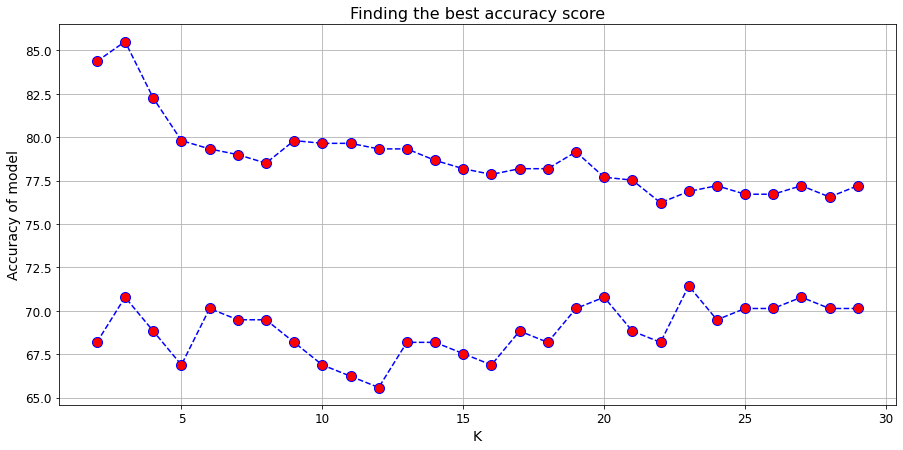

In [ ]:
plot_k()

<a name = Section83></a>
### **8.3 Model Development & Evaluation for Optimal K**

---
**<h4>Question 13:** Use the previously written functions to train a new KNN classifier model with the best value of K and evaluate it on train and test scores</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `model_classifers_generate` and `train_n_eval()` functions to fit and evaluate the new model.

- Use the optimal value of K obtained (say 23)

</details>

In [ ]:
train_n_eval(clf=model_classifers_generate(k=23))

Performance Metric of KNeighborsClassifier :
[Train Accuracy]: 0.7687296416938111
[Test Accuracy]: 0.7142857142857143
----------------------------------------



**Observations:**

- The **train** accuracy obtained is **76.8%** and the **test** accuracy obtained is **71.4%**.

- This model has **fit well** with the data

<a name = Section9></a>

---
# **9. Conclusion**
---

- We have observed that **high values** of **BMI** can result in **diabetes** in the patients.

- **Glucose levels** seem to be **arbitrary** for diabetic and non-diabetic patients according to the analysis.

- **Diabetic patients** can have glucose levels as **low as 50mg/dL** which may be a result of **controlling sugar**.

- We **don't observe** a direct effect of **Blood Pressure** on diabetes.

- But since **Blood Pressure** has a **correlation with BMI**, it may have some **unidentified effects** on the **diabetic condition** of a patient.

- Based on our observations, we can **select the KNN** model and **test** it on **real-world data** and **decide** if we can use the model or not.

- The model should help the diagnostic centre to properly **determine** if a **patient** is **pre-diabetic** or not.